In [1]:
import os
import glob
import numpy as np
import time

from six import BytesIO

import matplotlib.pyplot as plt
import cv2
from PIL import Image
from object_detection.utils import visualization_utils as viz_utils

import tensorflow as tf

In [3]:
ROOT_PATH = '/home/user/Helipad_Detection'

In [4]:
MODEL_NAME = 'exp03_SSD_MBN_v2'

MODEL_PATH = os.path.join(ROOT_PATH, 'workspace/exported-models', MODEL_NAME)
# IMAGE_PATH = os.path.join(ROOT_PATH, 'workspace/images/stanford/test')
IMAGE_PATH = os.path.join(ROOT_PATH, 'workspace/images/inf')

print(MODEL_PATH)
print(IMAGE_PATH)

/home/user/Helipad_Detection/workspace/exported-models/exp03_SSD_MBN_v2
/home/user/Helipad_Detection/workspace/images/inf


### Load Model

In [5]:
def load_model(model_path):
    start_time = time.time()
    tf.keras.backend.clear_session()
    detect_fn = tf.saved_model.load(model_path + '/saved_model')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Elapsed time: ' + str(elapsed_time) + 's')
    return detect_fn

In [6]:
detect_fn = load_model(MODEL_PATH)

2022-05-06 18:28:58.605682: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-06 18:28:59.152809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 45990 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:65:00.0, compute capability: 7.5


Elapsed time: 11.000154495239258s


### Load Sample Images

In [7]:
IMAGE_LIST = []
for ext in ('*.jpg', '*.jpeg', '*.png'):
    IMAGE_LIST.extend(glob.glob(os.path.join(IMAGE_PATH, ext)))

In [8]:
random_samples = np.random.choice(IMAGE_LIST, 3, replace=False)
random_samples

array(['/home/user/Helipad_Detection/workspace/images/inf/0.png',
       '/home/user/Helipad_Detection/workspace/images/inf/8.png',
       '/home/user/Helipad_Detection/workspace/images/inf/3.png'],
      dtype='<U55')

### Inference

In [9]:
sample_idx = 1

category_index = {1 : {'id' : 1, 'name':'helipad'},
                  2 : {'id' : 2, 'name':'Vehicle'},
                  3 : {'id' : 3, 'name':'Person'},}

In [41]:
image_np = cv2.imread(random_samples[sample_idx])
image_np_with_detections = image_np.copy()

In [44]:
input_tensor = np.expand_dims(image_np, 0)

In [45]:
detections = detect_fn(input_tensor)

In [46]:
viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.80,
        agnostic_mode=False)

array([[[  2,  82,  29],
        [  7, 109,  52],
        [  7, 107,  51],
        ...,
        [ 14, 122,  66],
        [ 10, 111,  55],
        [  7, 105,  49]],

       [[ 13, 123,  64],
        [ 12, 116,  60],
        [ 10, 116,  58],
        ...,
        [ 10, 111,  56],
        [  8, 106,  50],
        [  8, 113,  54]],

       [[ 16, 118,  65],
        [ 23, 137,  83],
        [ 17, 131,  73],
        ...,
        [  9, 107,  51],
        [  8,  93,  43],
        [  9, 101,  48]],

       ...,

       [[ 11, 111,  58],
        [ 14, 115,  64],
        [  8, 113,  55],
        ...,
        [ 30, 138,  89],
        [ 21, 123,  73],
        [ 11, 115,  59]],

       [[  8, 102,  49],
        [  4,  92,  40],
        [  6, 103,  46],
        ...,
        [ 19, 121,  71],
        [ 10, 112,  56],
        [  8, 109,  54]],

       [[  6, 103,  46],
        [  5,  94,  39],
        [  4,  83,  33],
        ...,
        [ 11, 113,  59],
        [ 11, 114,  58],
        [ 10, 109,  54]]

In [37]:
detections['detection_classes'][0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([3., 3., 3., 2., 3., 1., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 1., 1.,
       3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3.,
       3., 3., 1., 3., 3., 1., 3., 3., 3., 1., 3., 3., 3., 3., 3.],
      dtype=float32)>

In [38]:
heli_indicies = np.where(detections['detection_classes'][0]==1)[0]

In [39]:
np.take(detections['detection_scores'][0], heli_indicies)

array([0.02011082, 0.01601546, 0.01259879, 0.00960963, 0.00808126,
       0.00794043, 0.00786646, 0.00764256, 0.00741898, 0.00708343,
       0.00696085, 0.00689004], dtype=float32)

In [59]:
detections['detection_boxes'][0][5]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.33546284, 0.14781694, 0.5028028 , 0.27804053], dtype=float32)>

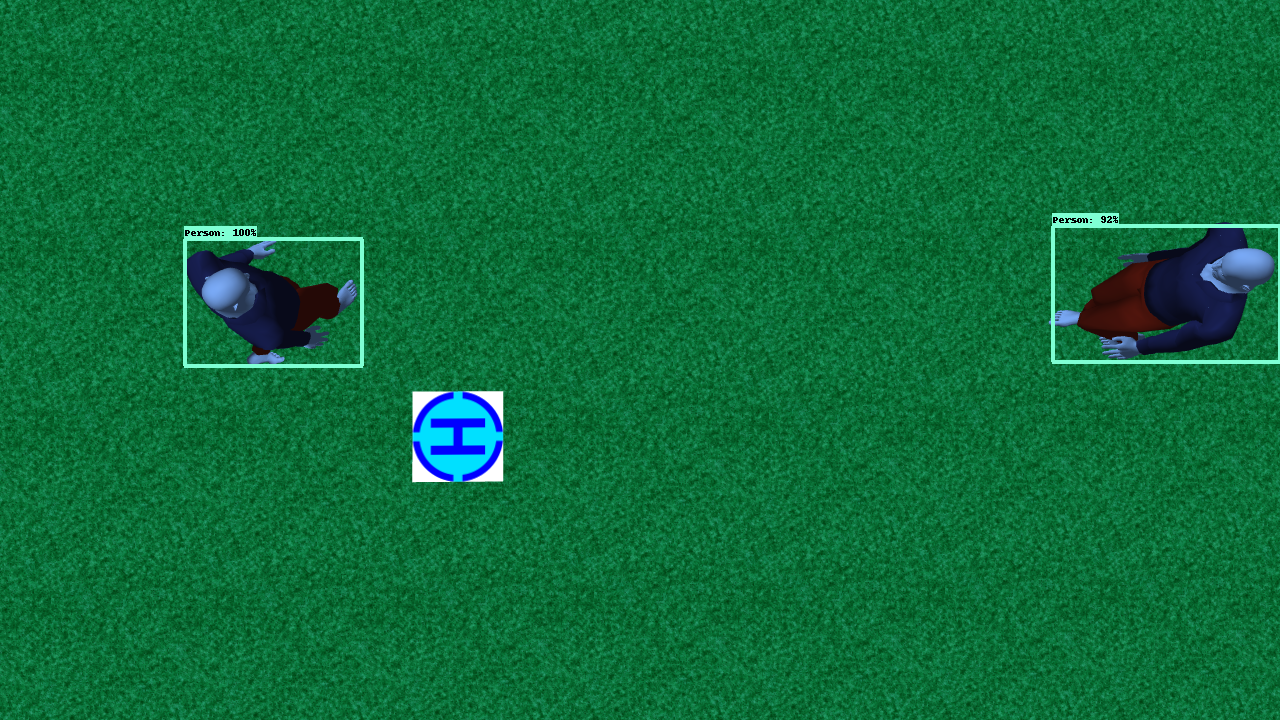

In [47]:
Image.fromarray(image_np_with_detections)